## Introduction:

How much did you weight at birth? If you don’t know, call your mother or someone else who knows. Using the pooled data (all live births), compute the distribution of birth weights and use it to find your percentile rank. 

If you were a first baby, find your percentile rank in the distribution for first babies. Otherwise use the distribution for others. If you are in the 90th percentile or higher, call your mother back and apologize.

In [1]:
import Cdf
import numpy as np
import score_example
import itertools
# import pandas as pd
import survey
import first
import matplotlib.pyplot as plt
%matplotlib inline 

score, percentile rank
55 20.0
66 40.0
77 60.0
88 80.0
99 100.0

prank, score, score
0 55 55
20 55 55
25 66 66
40 66 66
50 77 77
60 77 77
75 88 88
80 88 88
100 99 99


/usr/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


## Load Data:

In [2]:
table = survey.Pregnancies()
table.ReadRecords()
outcome_ = np.zeros([len(table.records), 1])

for i in xrange(len(table.records)):
    outcome_[i] = table.records[i].outcome

In [3]:
outcome_[1:10]  # 1 represents alive case

array([[ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.]])

In [4]:
partitions = first.PartitionRecords(table)
partitions  # divide the data to firsts, others .. 

(<survey.Pregnancies at 0x7fdc4c1596d0>,
 <survey.Pregnancies at 0x7fdc4c0e59d0>)

In [5]:
first_baby = partitions[0]
others = partitions[1]
len(first_baby), len(others)

(4413, 4735)

In [6]:
## tables 
t = first.MakeTables()
original_table = t[0]
firsts_table = t[1]
others_table = t[2]

original_table, firsts_table, others_table

(<survey.Pregnancies at 0x7fdc4c0e5790>,
 <survey.Pregnancies at 0x7fdc450c4210>)

In [7]:
first_baby_1 = np.zeros([len(firsts_table.records), 1]) ## oz
first_baby_2 = np.zeros([len(firsts_table.records), 1])  ## lb

for i in xrange(len(firsts_table.records)):
    try:
        first_baby_1[i] = firsts_table.records[i].birthwgt_oz
        first_baby_2[i] = firsts_table.records[i].birthwgt_lb
    except ValueError:
        first_baby_1[i] = 0
        first_baby_2[i] = 0
        
first_baby_ = first_baby_1 + first_baby_2
len(first_baby_)

4413

In [8]:
first_baby_[1:10]  ## weights of 1st 10 babies 

array([[ 11.],
       [ 17.],
       [ 16.],
       [ 20.],
       [  7.],
       [ 18.],
       [ 11.],
       [ 20.],
       [ 14.]])

In [9]:
others_baby_1 = np.zeros([len(others_table.records), 1]) ## oz
others_baby_2 = np.zeros([len(others_table.records), 1])  ## lb

for i in xrange(len(firsts_table.records)):
    try:
        others_baby_1[i] = others_table.records[i].birthwgt_oz
        others_baby_2[i] = others_table.records[i].birthwgt_lb
    except ValueError:
        others_baby_1[i] = 0
        others_baby_2[i] = 0
        
others_baby_ = others_baby_1 + others_baby_2
len(others_baby_)

4735

In [10]:
others_baby_[1:10]

array([[  7.],
       [  9.],
       [ 18.],
       [ 14.],
       [ 16.],
       [  4.],
       [ 15.],
       [ 11.],
       [ 13.]])

## Let's Calculate CDFs:

### 1st Babies:

In [11]:
merged = list(itertools.chain(*first_baby_))
len(merged)

4413

In [12]:
cdf_first = Cdf.MakeCdfFromList(merged)
# cdf_first.Items()[1:10]

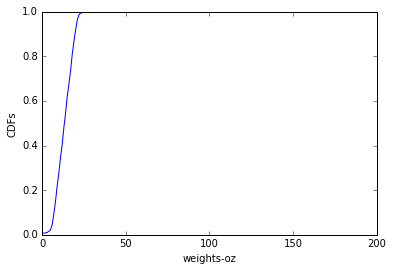

In [13]:
plt.plot(cdf_first.xs, cdf_first.ps)
plt.xlabel('weights')
plt.ylabel('CDFs')

Why only 100 cases were drawn !! :S

### Others:

In [14]:
merged_others = list(itertools.chain(*others_baby_))
len(merged_others)

4735

In [15]:
cdf_others = Cdf.MakeCdfFromList(merged_others)

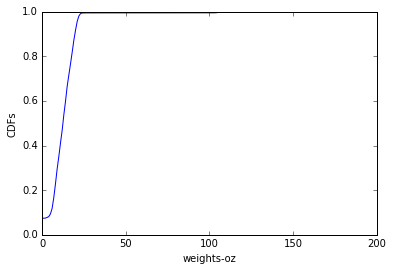

In [16]:
plt.plot(cdf_others.xs, cdf_others.ps)
plt.xlabel('weights-oz')
plt.ylabel('CDFs')

### Let's plot both curves togther to compare their distributions:

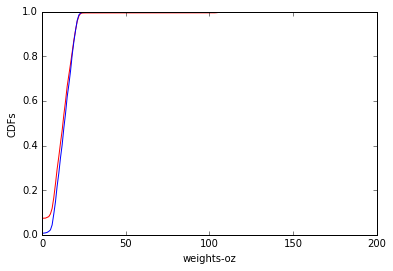

In [17]:
plt.plot(cdf_others.xs, cdf_others.ps, 'r', cdf_first.xs, cdf_first.ps, 'b')
plt.xlabel('weights-oz')
plt.ylabel('CDFs')

Blue ==> First_babies,   Red ==> Others 

- The shape of the distributions looks alike that one demonestrated in the textbook .. 

- We can see that first babies are slightly lighter throughout the distribution, with a larger discrepancy above the mean.

## Allocating my weight on the Cdf curve:

I were the first baby .. hence, I'll allocate my weight over the 1st babies curve .. and calculate my percentile rank ..  

In [18]:
def Percentile_Rank(weights, your_weight):
    count = 0
    
    for weight in weights:
        if weight <= your_weight:
            count += 1

    percentile_rank = 100.0 * count / len(weights)
    
    return percentile_rank

In [19]:
My_weight = 10
perc_rank = Percentile_Rank(first_baby_, My_weight)
perc_rank

27.600271923861317

This means that my weight is higher than 71.7% of the 1st babies ..  